<a href="https://colab.research.google.com/github/uteThAn/BaitapAI/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten

In [ ]:
cifar=tf.keras.datasets.cifar100
(x_train,y_train),(x_test,y_test)=cifar.load_data()

In [ ]:
names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle','bicycle',
     'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel','can',
     'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster','house', 
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose','sea', 
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm' ]
          

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


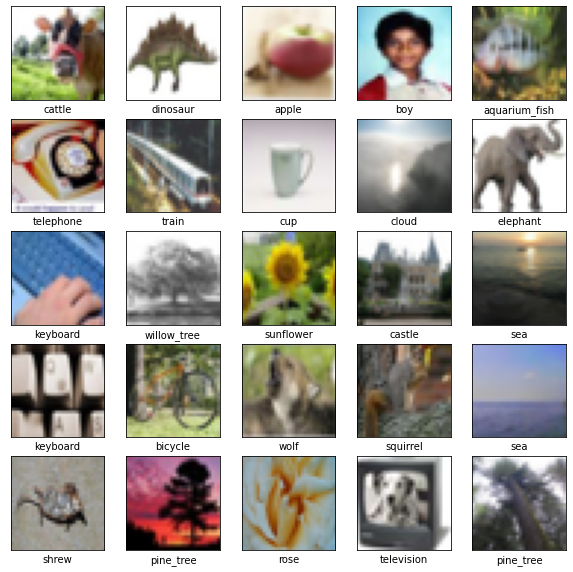

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  yt=y_train[i]
  plt.xlabel(names[(yt[0])])
plt.show()

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode="max",restore_best_weights=True)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(724,activation='relu'),
    tf.keras.layers.Dense(724,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(100,activation='softmax')
])
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_16 (Dense)            (None, 724)               742100    
                                                                 
 dense_17 (Dense)            (None, 724)               524900    
                                                                 
 dense_18 (Dense)            (None, 512)               371200    
                                                                 
 dense_19 (Dense)            (None, 100)               51300     
                                                                 
Total params: 4,836,252
Trainable params: 4,836,252
No

In [ ]:
#compiling the model...
from keras.backend import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001) #toi uu toc do hoc
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size=128,epochs=100,verbose=1,validation_data=(x_test,y_test),callbacks=[callback])


Epoch 1/100
391/391 [==============================] - 31s 77ms/step - loss: 4.1187 - accuracy: 0.0776 - val_loss: 3.8348 - val_accuracy: 0.1188
Epoch 2/100
391/391 [==============================] - 29s 75ms/step - loss: 3.7035 - accuracy: 0.1392 - val_loss: 3.6399 - val_accuracy: 0.1546
Epoch 3/100
391/391 [==============================] - 29s 75ms/step - loss: 3.5267 - accuracy: 0.1718 - val_loss: 3.5428 - val_accuracy: 0.1682
Epoch 4/100
391/391 [==============================] - 29s 74ms/step - loss: 3.4015 - accuracy: 0.1948 - val_loss: 3.4186 - val_accuracy: 0.1914
Epoch 5/100
391/391 [==============================] - 29s 74ms/step - loss: 3.2967 - accuracy: 0.2126 - val_loss: 3.3863 - val_accuracy: 0.1975
Epoch 6/100
391/391 [==============================] - 29s 74ms/step - loss: 3.2081 - accuracy: 0.2282 - val_loss: 3.3134 - val_accuracy: 0.2185
Epoch 7/100
391/391 [==============================] - 29s 74ms/step - loss: 3.1243 - accuracy: 0.2448 - val_loss: 3.2651 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/AI/cifar100.h5')

In [ ]:
#model = load_model('/content/drive/MyDrive/AI/cifar100.h5')


In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(x_test,y_test) 

313/313 [==============================] - 3s 11ms/step - loss: 3.5087 - accuracy: 0.2898


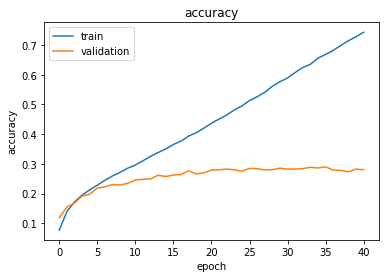

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

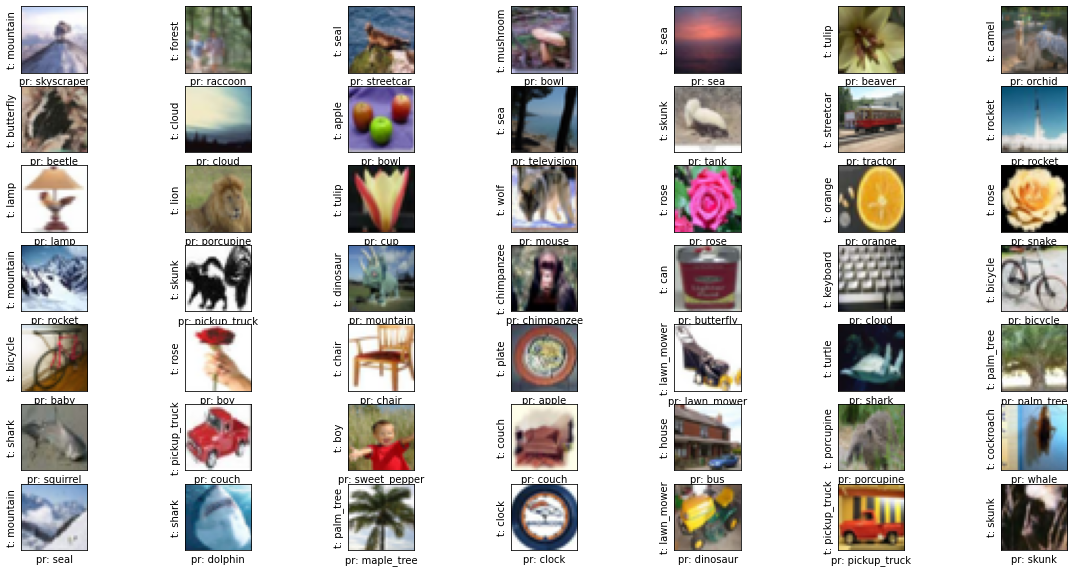

In [ ]:
y_pred = model.predict(x_test)
plt.figure(figsize=(20,10))
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x[i])
  plt.xlabel("pr: "+ names[np.argmax(y_pred[i])])
  yt=y_test[i]
  plt.ylabel( "t: "+ names[yt[0]])
plt.show()